In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



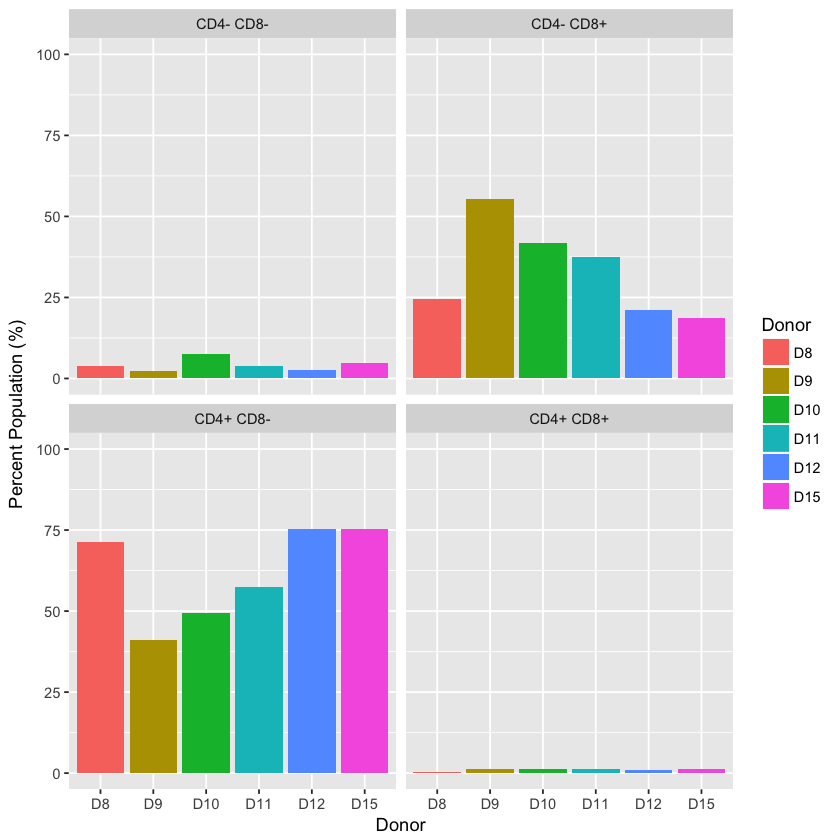

In [11]:
read_tsv(
    'cd3-cd4-cd8.tsv',
    col_types=cols(
        `Sample:`=col_character(),
        `Donor`=col_factor(levels=c("D8", "D9", "D10", "D11", "D12", "D15")),
        .default=col_double()
    )
) %>%
mutate(
    `CD4+ CD8-`=`Live/CD3+/CD4+ CD8- | Freq. of Parent`,
    `CD4- CD8+`=`Live/CD3+/CD4- CD8+ | Freq. of Parent`,
    `CD4- CD8-`=`Live/CD3+/CD4- CD8- | Freq. of Parent`,
    `CD4+ CD8+`=`Live/CD3+/CD4+ CD8+ | Freq. of Parent`
) %>%
select(`Donor`, `CD4+ CD8-`:`CD4+ CD8+`) %>%
gather(
    key="Population",
    value="Frequency",
    `CD4+ CD8-`:`CD4+ CD8+`
) %>%
ggplot(aes(x=`Donor`, y=`Frequency`, group=`Population`, fill=`Donor`)) +
    geom_col() +
    facet_wrap(~`Population`) +
    ylim(0, 100) +
    ylab('Percent Population (%)')

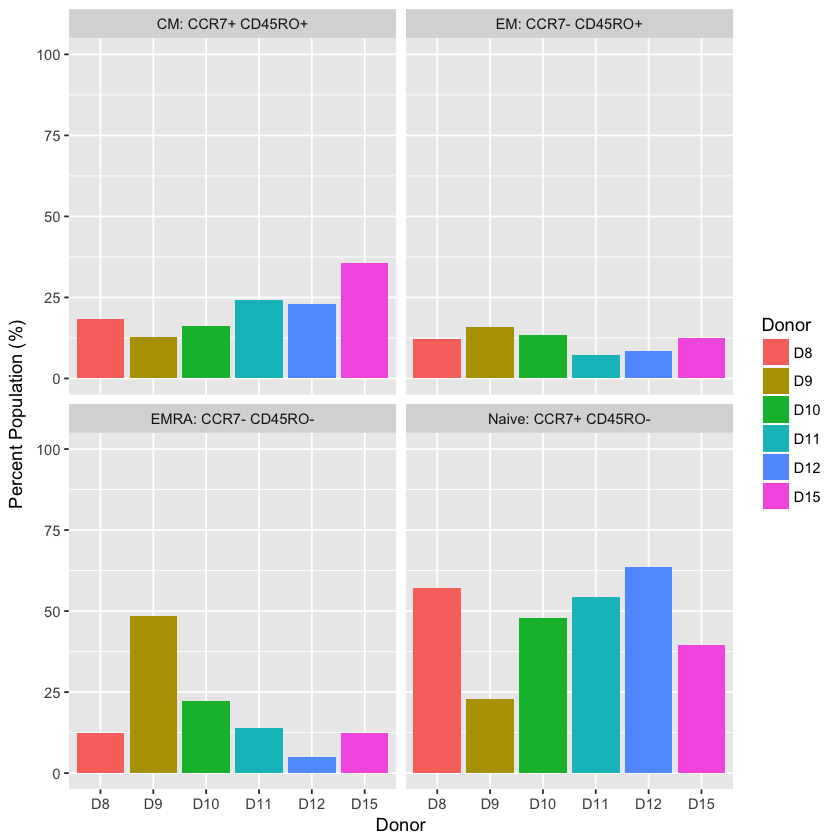

In [12]:
read_tsv(
    'naive-eff-central-memory.tsv',
    col_types=cols(
        `Sample:`=col_character(),
        `Donor`=col_factor(levels=c("D8", "D9", "D10", "D11", "D12", "D15")),
        .default=col_double()
    )
) %>%
mutate(
    `EMRA: CCR7- CD45RO-`=`Live/CCR7- CD45RO- | Freq. of Parent`,
    `EM: CCR7- CD45RO+`=`Live/CCR7- CD45RO+ | Freq. of Parent`,
    `Naive: CCR7+ CD45RO-`=`Live/CCR7+ CD45RO- | Freq. of Parent`,
    `CM: CCR7+ CD45RO+`=`Live/CCR7+ CD45RO+ | Freq. of Parent`
) %>%
select(`Donor`, `EMRA: CCR7- CD45RO-`:`CM: CCR7+ CD45RO+`) %>%
gather(
    key="Population",
    value="Frequency",
    `EMRA: CCR7- CD45RO-`:`CM: CCR7+ CD45RO+`
) %>%
ggplot(aes(x=`Donor`, y=`Frequency`, group=`Population`, fill=`Donor`)) +
    geom_col() +
    facet_wrap(~`Population`) +
    ylim(0, 100) +
    ylab('Percent Population (%)')